# Introduction to Optimus

## Install

From command line:

```
pip install optimuspyspark
```

from a notebook you can use:

```
!pip install optimuspyspark
```

A good thing to do here is to restart the kernel. 

In [1]:
# Checking the installation
from optimus import Optimus
op= Optimus(master="local")

## DataFrame creation

Create a dataframe to passing a list of values for columns and rows. Unlike pandas you need to specify the column names.

In [2]:
df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [
        
        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111",[8.5344, 4300.0]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2.0, ["Bumble","Goldback"], "10.642707,-71.612534",[5.334, 2000.0]),
        ("ironhide&", 26.0, "Security", 7, 4.0, ["Roadbuster"], "37.789563,-122.400356",[7.9248, 4000.0]),
        ("Jazz",13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553",[3.9624, 1800.0]),
        ("Megatron",None, "None", None, 5.7, ["Megatron"], None,[None,5700.0]),
        ("Metroplex_)^$",300.0 , "Battle Station", 8, None, ["Metroflex"],None,[91.44, None]),
        
    ])

In [5]:
# View the data with plain spark
df.show() # kinda ugly

+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|        names|height(ft)|        function|rank|weight(t)|     japanese name|       last position|      attributes|
+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|     Optim'us|      28.0|          Leader|  10|      4.3|  [Inochi, Convoy]|19.442735,-99.201111|[8.5344, 4300.0]|
| bumbl#ebéé  |      17.5|       Espionage|   7|      2.0|[Bumble, Goldback]|10.642707,-71.612534| [5.334, 2000.0]|
|    ironhide&|      26.0|        Security|   7|      4.0|      [Roadbuster]|37.789563,-122.40...|[7.9248, 4000.0]|
|         Jazz|      13.0|First Lieutenant|   8|      1.8|         [Meister]|33.670666,-117.84...|[3.9624, 1800.0]|
|     Megatron|      null|            None|null|      5.7|        [Megatron]|                null|      [, 5700.0]|
|Metroplex_)^$|     300.0|  Battle Station|   8|     null|       [Metrof


Creating a dataframe by passing a list of tuples specifyng the column data type. You can specify as data type an string or a Spark Datatypes. https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/types/package-summary.html

Also you can use some Optimus predefined types:

- "str" = StringType()
- "int" = IntegerType()
- "float" = FloatType()
- "bool" = BoleanType()

In [6]:
f = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.show()

+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|        names|height(ft)|        function|rank|weight(t)|     japanese name|       last position|      attributes|
+-------------+----------+----------------+----+---------+------------------+--------------------+----------------+
|     Optim'us|      28.0|          Leader|  10|      4.3|  [Inochi, Convoy]|19.442735,-99.201111|[8.5344, 4300.0]|
| bumbl#ebéé  |      17.5|       Espionage|   7|      2.0|[Bumble, Goldback]|10.642707,-71.612534| [5.334, 2000.0]|
|    ironhide&|      26.0|        Security|   7|      4.0|      [Roadbuster]|37.789563,-122.40...|[7.9248, 4000.0]|
|         Jazz|      13.0|First Lieutenant|   8|      1.8|         [Meister]|33.670666,-117.84...|[3.9624, 1800.0]|
|     Megatron|      null|            None|null|      5.7|        [Megatron]|                null|      [, 5700.0]|
|Metroplex_)^$|     300.0|  Battle Station|   8|     null|       [Metrof

## Creating a Daframe using a pandas dataframe

In [7]:
import pandas as pd
import numpy as np

data = [("bumbl#ebéé  ", 17.5, "Espionage", 7),
         ("Optim'us", 28.0, "Leader", 10),
         ("ironhide&", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

df = op.create.df(pdf = pdf)
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,Espionage,17.5,7
Optim'us,Leader,28.0,10
ironhide&,Security,26.0,7


## Columns and Rows

Optimus organized operations in columns and rows. This is a little different of how pandas works in which all operations are around the pandas class. We think this approach can better help you to access and transform data.

In [8]:
df.cols.sort().show()

+---------+------+------------+----+
| function|height|       names|rank|
+---------+------+------------+----+
|Espionage|  17.5|bumbl#ebéé  |   7|
|   Leader|  28.0|    Optim'us|  10|
| Security|  26.0|   ironhide&|   7|
+---------+------+------------+----+



In [9]:
df.rows.sort("rank").show()

+------------+------+---------+----+
|       names|height| function|rank|
+------------+------+---------+----+
|    Optim'us|  28.0|   Leader|  10|
|bumbl#ebéé  |  17.5|Espionage|   7|
|   ironhide&|  26.0| Security|   7|
+------------+------+---------+----+



## Selection

Unlike Pandas, Spark DataFrames don't support random row access. So methods like loc in pandas are not available.

Also Pandas don't handle indexes. So methods like iloc are not available.

In [10]:
# Select an show an specific column
df.cols.select("names").show()

+------------+
|       names|
+------------+
|bumbl#ebéé  |
|    Optim'us|
|   ironhide&|
+------------+



In [11]:
# This works with plain Spark too
df.select("names").show()

+------------+
|       names|
+------------+
|bumbl#ebéé  |
|    Optim'us|
|   ironhide&|
+------------+



In [12]:
# Select rows from a DataFrame where a the condition is meet
df.rows.select(df["rank"]>7).show()

+--------+------+--------+----+
|   names|height|function|rank|
+--------+------+--------+----+
|Optim'us|  28.0|  Leader|  10|
+--------+------+--------+----+



In [13]:
# This is something like a filter in Spark
df.filter(df["rank"]>7).show()

+--------+------+--------+----+
|   names|height|function|rank|
+--------+------+--------+----+
|Optim'us|  28.0|  Leader|  10|
+--------+------+--------+----+



This may seem weird, why we are overriding some functions, but it was needed to add more functionalities that Spark won't handle.

In [14]:
# Creating an id for a DF
df.create_id().show()

+------------+------+---------+----+---+
|       names|height| function|rank| id|
+------------+------+---------+----+---+
|bumbl#ebéé  |  17.5|Espionage|   7|  0|
|    Optim'us|  28.0|   Leader|  10|  1|
|   ironhide&|  26.0| Security|   7|  2|
+------------+------+---------+----+---+



In [15]:
# Creating new columns

df.cols.append("new_col",1).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|new_col|
+------------+------+---------+----+-------+
|bumbl#ebéé  |  17.5|Espionage|   7|      1|
|    Optim'us|  28.0|   Leader|  10|      1|
|   ironhide&|  26.0| Security|   7|      1|
+------------+------+---------+----+-------+



In plain Spark to do the same you will need to do:

In [16]:
from pyspark.sql.functions import lit
df.withColumn("new_col", lit(1)).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|new_col|
+------------+------+---------+----+-------+
|bumbl#ebéé  |  17.5|Espionage|   7|      1|
|    Optim'us|  28.0|   Leader|  10|      1|
|   ironhide&|  26.0| Security|   7|      1|
+------------+------+---------+----+-------+



Which is not straightforward at all. 

## Creating a simple plot

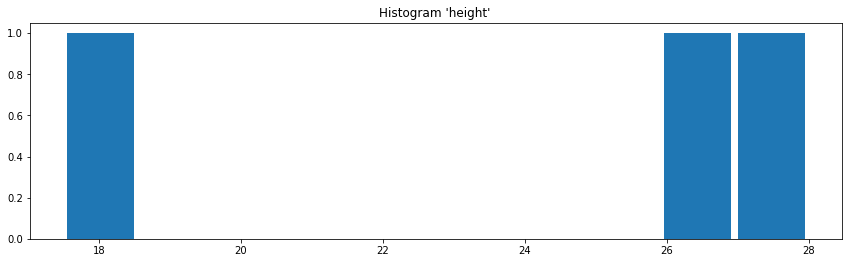

In [27]:
df.plot.hist("height",10)

Yes now you can plot spark DF that easy. 

## Reading external data

In [43]:
df_csv = op.load.csv("foo.csv", header=True)
df_csv.show()

+---+--------------------+--------------------+---------+----------+-----+----------+--------+
| id|           firstName|            lastName|billingId|   product|price|     birth|dummyCol|
+---+--------------------+--------------------+---------+----------+-----+----------+--------+
|  1|                Luis|         Alvarez$$%!|      123|      Cake|   10|1980/07/07|   never|
|  2|               André|              Ampère|      423|      piza|    8|1950/07/08|   gonna|
|  3|               NiELS|          Böhr//((%%|      551|     pizza|    8|1990/07/09|    give|
|  4|                PAUL|              dirac$|      521|     pizza|    8|1954/07/10|     you|
|  5|              Albert|            Einstein|      634|     pizza|    8|1990/07/11|      up|
|  6|             Galileo|             GALiLEI|      672|     arepa|    5|1930/08/12|   never|
|  7|                CaRL|            Ga%%%uss|      323|      taco|    3|1970/07/13|   gonna|
|  8|               David|          H$$$ilbert|   

## Reading data from the Web

In [22]:
df_url =op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv")
df_url.show()

+---+--------------------+--------------------+---------+----------+-----+----------+--------+
| id|           firstName|            lastName|billingId|   product|price|     birth|dummyCol|
+---+--------------------+--------------------+---------+----------+-----+----------+--------+
|  1|                Luis|         Alvarez$$%!|      123|      Cake|   10|1980/07/07|   never|
|  2|               André|              Ampère|      423|      piza|    8|1950/07/08|   gonna|
|  3|               NiELS|          Böhr//((%%|      551|     pizza|    8|1990/07/09|    give|
|  4|                PAUL|              dirac$|      521|     pizza|    8|1954/07/10|     you|
|  5|              Albert|            Einstein|      634|     pizza|    8|1990/07/11|      up|
|  6|             Galileo|             GALiLEI|      672|     arepa|    5|1930/08/12|   never|
|  7|                CaRL|            Ga%%%uss|      323|      taco|    3|1970/07/13|   gonna|
|  8|               David|          H$$$ilbert|   

## Joins, merge, concat, etc.

Optimus provides and intuitive way to concat Dataframes by columns or rows. Operations like `join` and `group` are handle using Spark directly

In [34]:
# We have this dataframe
df.show()

+------------+------+---------+----+
|       names|height| function|rank|
+------------+------+---------+----+
|bumbl#ebéé  |  17.5|Espionage|   7|
|    Optim'us|  28.0|   Leader|  10|
|   ironhide&|  26.0| Security|   7|
+------------+------+---------+----+



In [40]:
# Let's add a new column
df_new = op.create.df(
    [
        "try"
    ],
    [
        ("one"),
        ("two"),
        ("three")  
    ])

df_new = op.append([df,df_new], "columns")

In [41]:
df_new.show()

+------------+------+---------+----+-----+
|       names|height| function|rank|  try|
+------------+------+---------+----+-----+
|bumbl#ebéé  |  17.5|Espionage|   7|  one|
|    Optim'us|  28.0|   Leader|  10|  two|
|   ironhide&|  26.0| Security|   7|three|
+------------+------+---------+----+-----+



In [37]:
df_new.printSchema()

root
 |-- names: string (nullable = true)
 |-- height: double (nullable = true)
 |-- function: string (nullable = true)
 |-- rank: long (nullable = true)
 |-- try: string (nullable = true)



In [38]:
# Let's add a new row

new_row = [("favio", 10, "Leader", 1, "new_row")]
df_new = df_new.rows.append(new_row).show()

+------------+------+---------+----+-------+
|       names|height| function|rank|    try|
+------------+------+---------+----+-------+
|bumbl#ebéé  |  17.5|Espionage|   7|    one|
|    Optim'us|  28.0|   Leader|  10|    two|
|   ironhide&|  26.0| Security|   7|  three|
|       favio|  10.0|   Leader|   1|new_row|
+------------+------+---------+----+-------+



## Doing fun stuff with columns and rows

In [42]:
# Let's create a dataframe :)


from pyspark.sql.types import StructType, StructField, StringType, BooleanType, IntegerType, ArrayType

df = op.create.df(
            [
                ("words", "str", True),
                ("num", "int", True),
                ("animals", "str", True),
                ("thing", StringType(), True),
                ("two strings", StringType(), True),
                ("filter", StringType(), True),
                ("num 2", "string", True),
                ("col_array",  ArrayType(StringType()), True),
                ("col_int",  ArrayType(IntegerType()), True)

            ]
,
[
                ("  I like     fish  ", 1, "dog", "housé", "cat-car", "a","1",["baby", "sorry"],[1,2,3]),
                ("    zombies", 2, "cat", "tv", "dog-tv", "b","2",["baby 1", "sorry 1"],[3,4]),
                ("simpsons   cat lady", 2, "frog", "table","eagle-tv-plus","1","3", ["baby 2", "sorry 2"], [5,6,7]),
                (None, 3, "eagle", "glass", "lion-pc", "c","4", ["baby 3", "sorry 3"] ,[7,8])
            ])

In [45]:
df.show()

+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              words|num|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+



With Optimus you can select columns with index or name, and even combined

In [46]:
columns = ["words", 1, "animals", 3]
df.cols.select(columns).show()

+-------------------+---+-------+-----+
|              words|num|animals|thing|
+-------------------+---+-------+-----+
|  I like     fish  |  1|    dog|housé|
|            zombies|  2|    cat|   tv|
|simpsons   cat lady|  2|   frog|table|
|               null|  3|  eagle|glass|
+-------------------+---+-------+-----+



Select columns with a Regex

In [47]:
df.cols.select("n.*", regex = True).show()

+---+-----+
|num|num 2|
+---+-----+
|  1|    1|
|  2|    2|
|  2|    3|
|  3|    4|
+---+-----+



Select all the columns of type string

In [48]:
df.cols.select("*", data_type = "str").show()

+-----+-------------------+-------------+------+-----+-------+
|num 2|              words|  two strings|filter|thing|animals|
+-----+-------------------+-------------+------+-----+-------+
|    1|  I like     fish  |      cat-car|     a|housé|    dog|
|    2|            zombies|       dog-tv|     b|   tv|    cat|
|    3|simpsons   cat lady|eagle-tv-plus|     1|table|   frog|
|    4|               null|      lion-pc|     c|glass|  eagle|
+-----+-------------------+-------------+------+-----+-------+



Rename a columun

In [49]:
df.cols.rename('num','number').show()

+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+
|              words|number|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |     1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|     2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|     2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|     3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+------+-------+-----+-------------+------+-----+-----------------+---------+



Rename multiple columns and uppercase all the columns¶

In [50]:
df.cols.rename([('num','number'),("animals","gods")], str.upper).show()

+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              WORDS|NUM|ANIMALS|THING|  TWO STRINGS|FILTER|NUM 2|        COL_ARRAY|  COL_INT|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+



Convert to uppercase

In [51]:
df.cols.rename(str.upper).show()

+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              WORDS|NUM|ANIMALS|THING|  TWO STRINGS|FILTER|NUM 2|        COL_ARRAY|  COL_INT|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+



Sort columns in alphabetical order

In [53]:
df.cols.sort(order = "asc").show()

+-------+-----------------+---------+------+---+-----+-----+-------------+-------------------+
|animals|        col_array|  col_int|filter|num|num 2|thing|  two strings|              words|
+-------+-----------------+---------+------+---+-----+-----+-------------+-------------------+
|    dog|    [baby, sorry]|[1, 2, 3]|     a|  1|    1|housé|      cat-car|  I like     fish  |
|    cat|[baby 1, sorry 1]|   [3, 4]|     b|  2|    2|   tv|       dog-tv|            zombies|
|   frog|[baby 2, sorry 2]|[5, 6, 7]|     1|  2|    3|table|eagle-tv-plus|simpsons   cat lady|
|  eagle|[baby 3, sorry 3]|   [7, 8]|     c|  3|    4|glass|      lion-pc|               null|
+-------+-----------------+---------+------+---+-----+-----+-------------+-------------------+



Drop multiple columns

In [54]:
df.cols.drop(["num","words"]).show()

+-------+-----+-------------+------+-----+-----------------+---------+
|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------+-----+-------------+------+-----+-----------------+---------+
|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------+-----+-------------+------+-----+-----------------+---------+



Sort by row values

In [56]:
df.rows.sort("animals").show()

+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              words|num|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+



Select by row

In [57]:
df.rows.select(df["num"]==1).show()

+-------------------+---+-------+-----+-----------+------+-----+-------------+---------+
|              words|num|animals|thing|two strings|filter|num 2|    col_array|  col_int|
+-------------------+---+-------+-----+-----------+------+-----+-------------+---------+
|  I like     fish  |  1|    dog|housé|    cat-car|     a|    1|[baby, sorry]|[1, 2, 3]|
+-------------------+---+-------+-----+-----------+------+-----+-------------+---------+



## Chaining

.cols y .rows attributes are used to organize and encapsulate optimus functionality apart from Apache Spark Dataframe API.

At the same time it can be helpfull when you look at the code because every line is self explained.

The past transformations were done step by step, but this can be achieved by chaining all operations into one line of code, like the cell below. This way is much more efficient and scalable because it uses all optimization issues from the lazy evaluation approach.

In [55]:
print("Orginal DF")
df.show()

print("New DF")
df\
    .cols.rename([('num','number')])\
    .cols.drop(["number","words"])\
    .withColumn("new_col_2", lit("spongebob"))\
    .cols.append("new_col_1", 1)\
    .cols.sort(order= "desc")\
    .rows.drop(df["num 2"] == 3)\
    .show()

Orginal DF
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|              words|num|animals|thing|  two strings|filter|num 2|        col_array|  col_int|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+
|  I like     fish  |  1|    dog|housé|      cat-car|     a|    1|    [baby, sorry]|[1, 2, 3]|
|            zombies|  2|    cat|   tv|       dog-tv|     b|    2|[baby 1, sorry 1]|   [3, 4]|
|simpsons   cat lady|  2|   frog|table|eagle-tv-plus|     1|    3|[baby 2, sorry 2]|[5, 6, 7]|
|               null|  3|  eagle|glass|      lion-pc|     c|    4|[baby 3, sorry 3]|   [7, 8]|
+-------------------+---+-------+-----+-------------+------+-----+-----------------+---------+

New DF
+-----------+-----+-----+---------+---------+------+---------+-----------------+-------+
|two strings|thing|num 2|new_col_2|new_col_1|filter|  col_int|        col_array|animals|
+-----------+-----+-----+---------+--------